# ep5 principal component analysis to differentiate price trends

In this episode, I would like to perform principal component analysis to differentiate price trends.  Before diving into the principal component analysis, let's first visually observe the price trends of some stocks.  We first retrieve the price trends of two technology stocks,i.e., AAPL and AMZN, both of which have presented sustained growth over the last year and neither appear to have retracted significantly due to COVID.

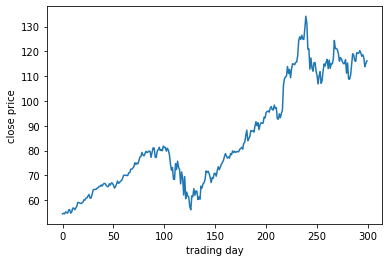

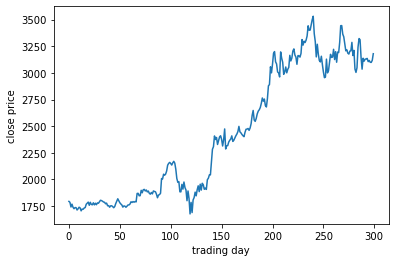

In [2]:
import matplotlib.pyplot as plt
from my_stock import read_stock
df = read_stock('AAPL')
plt.plot(df['Close'])
plt.xlabel('trading day')
plt.ylabel('close price')
plt.show()
df = read_stock('AMZN')
plt.plot(df['Close'])
plt.xlabel('trading day')
plt.ylabel('close price')
plt.show()

Now let's take a look at the price trends of two energy stocks, CVX and TOT.

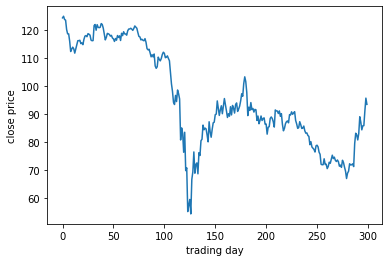

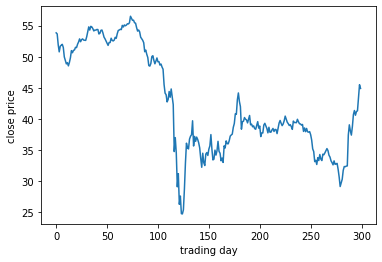

In [3]:
df = read_stock('CVX')
plt.plot(df['Close'])
plt.xlabel('trading day')
plt.ylabel('close price')
plt.show()
df = read_stock('TOT')
plt.plot(df['Close'])
plt.xlabel('trading day')
plt.ylabel('close price')
plt.show()

As can be seen from the comparisons above, AAPL and AMZN share similar performance characteristics and CVX and TOT performance resemble each other.  On the other hand, performance characteristics of (AAPL, AMZN) is obviously different from those of (CVX,TOT).  Principal component analysis (PCA) is capable of systematically and quantitatively representing such `difference-to-the-eye` using 'principal components (PC)'.  Below we compile the price trends of all S&P 500 stocks in preparation for pincipal component analysis.

In [4]:
import time
import pandas as pd
import numpy as np

t_0 = time.time()
df_SP500 = pd.read_csv('SP500 list.csv')

def read_stock_close_to_array(symbol):
    df = read_stock(symbol)['Close']
    df = (df-df.min())/(df.max()-df.min())  # with this line, we normalize the daily close price with respect to the min. and max. price observed during the period of interest
    ar = np.array(df)
    return ar    

df_stock_price_trend = pd.DataFrame(list(df_SP500['Symbol'].apply(read_stock_close_to_array)))
df_stock_price_trend['Symbol'] = df_SP500['Symbol']
df_stock_price_trend.set_index('Symbol',inplace=True)

t_f = time.time()
print('load',len(df_SP500),'stocks took',t_f - t_0,'seconds')
df_stock_price_trend.dropna(inplace=True)
print(len(df_stock_price_trend),'stocks remaining')
df_stock_price_trend.head(10)

load 505 stocks took 199.25858330726624 seconds
500 stocks remaining


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Symbol,,,,,,,,,,,,,,,,,,,,,
MMM,0.769921,0.769921,0.738110,0.726457,0.723780,0.734803,0.732756,0.637953,0.594961,0.588346,...,0.774488,0.817638,0.881732,0.878268,0.842992,0.846299,0.866457,0.886142,0.932441,0.923465
ABT,0.402326,0.394186,0.380233,0.388372,0.384496,0.368605,0.404070,0.368605,0.323837,0.353682,...,0.952132,0.964729,0.985465,0.973643,0.909884,0.933721,0.931589,0.900194,0.868023,0.844186
ABBV,0.199949,0.213634,0.214141,0.192347,0.241510,0.262291,0.284339,0.221237,0.193360,0.236949,...,0.838824,0.875317,0.858084,0.879625,0.867207,0.891282,0.920933,0.954891,1.000000,0.998986
ABMD,0.333798,0.297603,0.288702,0.293689,0.252775,0.243337,0.254062,0.212880,0.176310,0.195828,...,0.738806,0.759236,0.762722,0.747600,0.727653,0.751247,0.738377,0.728833,0.724757,0.718939
ACN,0.464679,0.462327,0.436930,0.443796,0.455554,0.448594,0.457718,0.432038,0.387170,0.396200,...,0.888533,0.922679,0.952497,0.941868,0.903396,0.936036,0.938294,0.964255,1.000000,0.998777
ATVI,0.080539,0.063915,0.057610,0.085698,0.065062,0.010891,0.027802,0.027228,0.008598,0.060762,...,0.709659,0.733735,0.730582,0.721124,0.674979,0.687303,0.712525,0.687016,0.667240,0.699628
ADBE,0.061677,0.059954,0.041729,0.059917,0.083312,0.060321,0.055590,0.042609,0.020425,0.041473,...,0.738843,0.763632,0.732866,0.758535,0.727439,0.752888,0.740090,0.731620,0.739284,0.753988
AMD,0.028460,0.037686,0.020172,0.020485,0.019390,0.007662,0.011884,0.008288,0.001251,0.007037,...,0.838311,0.831900,0.867866,0.862080,0.849257,0.896169,0.882095,0.892572,0.888819,0.919937
AAP,0.852012,0.910426,0.889300,0.921622,0.901553,0.915285,0.954579,0.974543,0.928805,0.896060,...,0.824232,0.834161,0.803106,0.784515,0.771839,0.750502,0.732017,0.745009,0.790113,0.789057


As can be seen from the time of execution of the above code block, it is quite time-consuming to perform a compilation of the price trends of all stocks.  Therefore, we save this compilation in a file: `stock_price_trend.csv` for faster recall later.

In [5]:
df_stock_price_trend.to_csv('stock_price_trend.csv',header=False)

We will perform the principal component analysis in the code block below.  Before showing the results from the principal component analysis, I would like to first discuss the *principle* of the principal component analysis.  With a sample data matrix $\textbf{X}$, whose size is $n\times p$ (if we use the stock price table above as an example, $n$ would correspond to the number of stocks and $p$ would correspond to the number of trading days considered), the objective of the principal component analysis is to compute a transformation matrix $\textbf{w}$, whose size is $p\times k$ ($k$ is the number of principal components considered), such that after the original sample $\textbf{X}$ is transformed to $\textbf{T} = \textbf{X}\cdot \textbf{w}$, the variation of the $i-$th principal components among different samples are maximized.

Concretely, each principal component is a linear combination of all the original attributes possessed by the samples.  For example, the value of the first principal component of the first sample can be computed according to the equation below.

$$t_{1,1}=\Sigma_{i=1,2,...p}x_{1,i}\cdot w_{i,1}$$

The transformation matrix, $\textbf{w}$ essentially defines a recipe to 'blend' the original attributes to form the principal components.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_stock_price_red = pd.DataFrame(pca.fit_transform(df_stock_price_trend),columns=['PC1','PC2','PC3'],index=df_stock_price_trend.index)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
df_stock_price_red.head(10)

[0.59202313 0.16167806 0.08941634]
0.8431175267624641


,PC1,PC2,PC3
Symbol,,,
MMM,-0.202427,-2.175365,-0.306284
ABT,3.280617,-0.416211,-0.024012
ABBV,2.119794,-0.656858,1.485148
ABMD,4.247093,1.180635,-0.423926
ACN,2.415816,-0.729568,-0.562100
ATVI,5.541820,1.589000,0.822418
ADBE,4.759140,1.812122,-0.008734
AMD,4.679859,1.783912,-0.337912
AAP,0.024972,-3.275190,-0.483464


The three scores: $0.59$, $0.16$ and $0.09$ characterize the fractional variation among stock price trends that can be explained by the corresponding principal component.  It is noted that the cumulative variation explainable by the three principal components combined is 0.84.  It is quite amazing that with as few as 3 principal components, above 80% of the variations in the price trends can be explained.  We plot the pairs of `(PC1,PC2)` obtained from all the stocks in the figure below.  In addition, we highlight the `(PC1,PC2)` pairs obtained with the two aforementioned technology stocks, i.e., `AMZN` and `AAPL`, and the two energy stocks, i.e., `CVX` and `TOT` in red and yellow respectively.

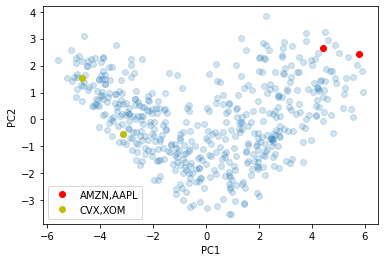

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df_stock_price_red['PC1'],df_stock_price_red['PC2'],alpha=0.2)
plt.plot(df_stock_price_red.loc['AMZN']['PC1'],df_stock_price_red.loc['AMZN']['PC2'],'ro',label='AMZN,AAPL')
plt.plot(df_stock_price_red.loc['AAPL']['PC1'],df_stock_price_red.loc['AAPL']['PC2'],'ro')
plt.plot(df_stock_price_red.loc['CVX']['PC1'],df_stock_price_red.loc['CVX']['PC2'],'yo',label='CVX,XOM')
plt.plot(df_stock_price_red.loc['XOM']['PC1'],df_stock_price_red.loc['XOM']['PC2'],'yo')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

It can be observed from the figure above that the two technology stocks (re. red dots), whose price trends resemble one another, indeed locate close to each other.  The same observation can be made for the two energy stocks (re. yellow dots) as well.  I was also interested in inspecting the price trend of a stock with `PC1`$\sim 0$ and `PC2`$\sim 2$.  We will look up stocks fitting this profile.

In [10]:
cand = df_stock_price_red[abs(df_stock_price_red['PC1'])<0.2]
cand

,PC1,PC2,PC3
Symbol,,,
AAP,0.024972,-3.275190,-0.483464
AON,0.076919,-0.432039,0.671468
BAX,-0.084835,-0.184315,3.329928
BWA,-0.165502,-1.499142,-0.923715
CAH,0.101149,0.318848,1.836389
CI,0.053605,-0.749909,1.748659
CMCSA,0.018918,0.437446,-1.103179
D,-0.079503,-2.557495,1.302720
GPS,0.091551,1.675610,-1.886868


`D` and `PFE` appears to be a good candidate and its location on the `(PC1,PC2)` map is confirmed by the figure below, although I have no idea which companies these two stock tickers represent, nor is that detail important.

In [11]:
df_SP500.set_index('Symbol').loc[cand.index]

,Security,GICSSector,GICS Sub-Industry
Symbol,,,
AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
AON,Aon plc,Financials,Insurance Brokers
BAX,Baxter International Inc.,Health Care,Health Care Equipment
BWA,BorgWarner,Consumer Discretionary,Auto Parts & Equipment
CAH,Cardinal Health Inc.,Health Care,Health Care Distributors
CI,CIGNA Corp.,Health Care,Managed Health Care
CMCSA,Comcast Corp.,Communication Services,Cable & Satellite
D,Dominion Energy,Utilities,Electric Utilities
GPS,Gap Inc.,Consumer Discretionary,Apparel Retail


Well, it looks like `D` represents Dominion Energy in the Utilities sector while `PFE` represents Pfizer.

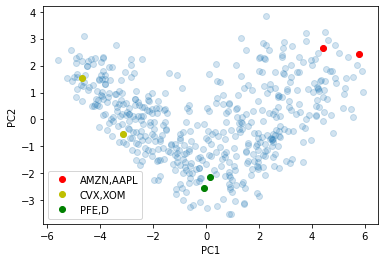

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df_stock_price_red['PC1'],df_stock_price_red['PC2'],alpha=0.2)
plt.plot(df_stock_price_red.loc['AMZN']['PC1'],df_stock_price_red.loc['AMZN']['PC2'],'ro',label='AMZN,AAPL')
plt.plot(df_stock_price_red.loc['AAPL']['PC1'],df_stock_price_red.loc['AAPL']['PC2'],'ro')
plt.plot(df_stock_price_red.loc['CVX']['PC1'],df_stock_price_red.loc['CVX']['PC2'],'yo',label='CVX,XOM')
plt.plot(df_stock_price_red.loc['XOM']['PC1'],df_stock_price_red.loc['XOM']['PC2'],'yo')
plt.plot(df_stock_price_red.loc['PFE']['PC1'],df_stock_price_red.loc['PFE']['PC2'],'go',label='PFE,D')
plt.plot(df_stock_price_red.loc['D']['PC1'],df_stock_price_red.loc['D']['PC2'],'go')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

The code block below visualizes the price trend of `D` and `PFE`.  It is noted that prior to visualization, the daily prices of `D` and `PFE` were normalized with respect to their corresponding 300-day high and 300-day low, according to the equation below: $$p_i=\frac{p_i-p_{min}}{p_{max}-p_{min}}$$

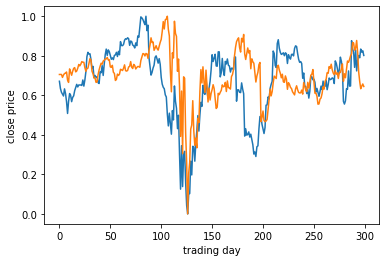

In [14]:
df = read_stock('PFE')
df = df['Close']
df = (df-df.min())/(df.max()-df.min())
plt.plot(df)
df = read_stock('D')
df = df['Close']
df = (df-df.min())/(df.max()-df.min())
plt.plot(df)
plt.xlabel('trading day')
plt.ylabel('close price')
plt.show()

The price trend of `PFE` and `D` indeed appear different from that of `AMZN` and `CVX`.  Inspired by the observation of the similarities/distinctions between stock groups, i.e., technology, energy and pharmaceutical (`PFE`), etc., I would like to perform a clustering analysis on the `(PC1,PC2)` dataset and assess the possibility of identifying groups of stocks within which the consituent stocks present similar price trends.  This clustering analysis will be presented in a subsequent and dedicated notebook episode.

I would also like to explore whether the possibility of making profit correlates w/ the values of the principal component.  In order to conduct this inspection, we first load the list of the stock with the corresponding maximal strategy gain.  We then use the `pandas.concat` function to join the list of principal components w/ the list of maximal strategy gain.  We then use the `lambda x` function to classify stocks as profitable and non-profitable.  Finally, we use the `matplotlib.pyplot.hist` module to generate histogram of the number of profitable stocks with respect to the value of the first principal component.

259 stocks in the profitable category
241 stocks in the non-profitable category


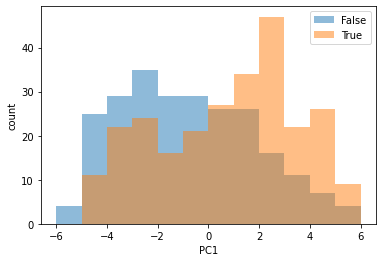

In [15]:
df_SP500 = pd.read_csv('opti.csv')
df_SP500.set_index(['Symbol'],inplace=True)
df_stock_price_red_labeled = pd.concat([df_stock_price_red,df_SP500['Max. Strategy Gain %']],join='inner',axis=1)
df_stock_price_red_labeled['Label'] = df_stock_price_red_labeled['Max. Strategy Gain %'].apply(lambda x: x>23)
print(len(df_stock_price_red_labeled[df_stock_price_red_labeled['Label']==True]),'stocks in the profitable category')
print(len(df_stock_price_red_labeled[df_stock_price_red_labeled['Label']==False]),'stocks in the non-profitable category')
for name,group in df_stock_price_red_labeled.groupby(by='Label'):
    plt.hist(group['PC1'],bins=range(-6,7),histtype='bar',alpha=0.5,label=name)    
plt.xlabel('PC1')
plt.ylabel('count')
plt.legend()
plt.show()

As can be see from the above figure, the higher value of PC1 warrants a higher possibility of being above to profit.  Essentially, this means if the stock presents sustained upward trend, there is a higher possibility that trading with strategy can produce gain.  ***Although intuitive, this conclusion appears quite trivial.***

To reiterate, the objective here is not to find stocks on which the trading algorithm can perform, while to correlate the performance characteristics of stocks to their fundamental and quantitative traits.  I would like to initiate another notebook to explore correlation between e.g., the principal components of stocks and their fundamental traits.

# scratch blocks below

## use the blocks below to test `sklearn` utilities

In [18]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
pca.explained_variance_ratio_

array([0.99244289, 0.00755711])

In [17]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

## use the blocks below to test `matplotlib` utilities

Text(0, 0.5, 'y')

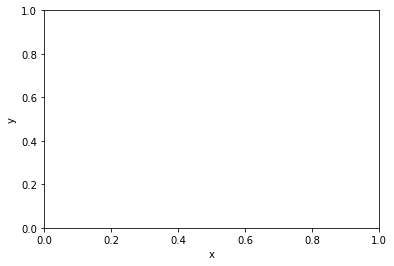

In [16]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,1)
axs.set_xlabel('x')
axs.set_ylabel('y')